# Tarea 1
Abihail Roque Ramírez

1.Realice un notebook en el que se programen y expliquen los siguientes algoritmos de integración de ecuaciones diferenciales.
    Verificando el funcionamiento encontrando la solución de la siguiente ecuación diferencial para $y(t)$.
    $$
    \ddot x + 0.5\dot x +sinx = e^{-t}sin(3t)
    $$
    con condiciones inciales $\dot x(0) = 1$ y $x(0)=0$

a) Integración con método de Euler 

In [1]:
from pylab import *
%matplotlib inline

In [2]:
def ecuacion(y,t):
    return array([y[1],-0.5*y[1]-sin(y[0])+exp(-t)*sin(3*t)])

def d_ecuacion(y,t):
    return array([0,-exp(-t)*sin(3*t)+exp(-t)*3*cos(3*t)]),array([[0,1],[-cos(y[0]),-0.5]])

In [3]:
def euler(funcion, p_ini, t_final, h=0.01):   
    tiempos = arange(p_ini[0],t_final+h,h)    
    y = [0]*len(tiempos)                      
    y[0] = p_ini[1]                          
    for i in range(len(tiempos)-1):           
        y[i+1] = y[i] + funcion(y[i],tiempos[i])*h   
    solucion = [tiempos, y]                   
    return solucion                           

#Las entradas de la función son: la ecuación diferencial, la condición inicial que representa donde pasa la curva solución 
#de la ecuación,el tiempo final y h el paso de integración. 

#Se crea una lista tiempos con entradas desde la cond.inic. hasta el tiempo final más un paso de integración en intervalos 
#de h, y es el numéro de aprox. a realizar.

#y es un arreglo de tantos ceros como elementos hay en la lista tiempos.

#Definimos la primera entrada de y como la segunda entrada de la cond.inic.

#El ciclo for recorre la cantidad de elementos en tiempos menos uno.

#Realiza el algoritmo de euler f_1=f_0(x)+f_0'(x)h en cada vuelta, es decir,calcula las pendientes que se aproximan a la curva.

#Solución es el arreglo en el que la primera entrada está el tiempo y los valores y para cada vuelta en for.

#El integrador regresa la solución.

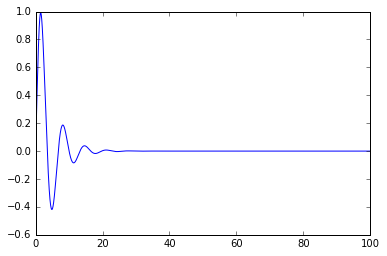

In [4]:
sol = euler(ecuacion,[0,array([0,1])],100)
y = zeros(len(sol[0]))
v = zeros(len(sol[0]))
for i in range(len(sol[1])):
    y[i] = sol[1][i][0]
    v[i] = sol[1][i][1]
plot(sol[0],y)
show()

b) Integración sobre serie de Taylor a 2° orden

In [5]:
def integra2(ec,d_ec,p_ini,x,h=0.1):                    #Para Taylor a segundo orden, se necesita la ecu. diferencial, las
                                                        #derivadas de la ec. dif., la cond. ini., el tiempo y el paso de 
                                                        #integración h.
    tiempos = arange(x[0],x[1]+h,h)                     #El arreglo de tiempos va de x a y más h en intervalos de h.
    sol = zeros((len(tiempos),len(p_ini)))              #La variable solución es una arreglo de ceros.
    sol[0,:]=p_ini                                      #Asignamos la cond. inic. a la columna 0 de la lista.  
    for t in xrange(len(tiempos)-1):                    #El ciclo va a recorrer la longitud de tiempo menos 1
        f=ec(sol[t,:],tiempos[t])                       #f es la ecu. dif. evaluada en la (solución, tiempo).
        df=d_ec(sol[t,:],tiempos[t])[0]                 #df son las derivadas parciales respecto a x de la ec. dif. 
                                                        #evaluadas en (solución,tiempo).
        jac=d_ec(sol[t,:],tiempos[t])[1]                #jac es el jacobiano evaluado en (solución, tiempo).
        sol[t+1,:] = sol[t,:] + (h*f) + (0.5*h*h)*(df+dot(jac,f))  #El algoritmo consiste en llevar a segundo orden Taylor,
                                                        #con una aprox. hasta la 2da derivada.
                                                        #En cada nuevo paso se tiene la solucion del paso anterior mas h por la 
                                                        #ec.dif.evaluada en el resultado del paso anterior más h**2/2 
                                                        #por la parcial respecto a x de la ec.dif. evaluada en el resultado del 
                                                        #paso anterior más el producto punto del jacobiano por la ec.dif 
                                                        #ambos evaluados en el resultado del paso anterior.
    return tiempos,sol                                  #La función regresa el arreglo de tiempo y soluciones.

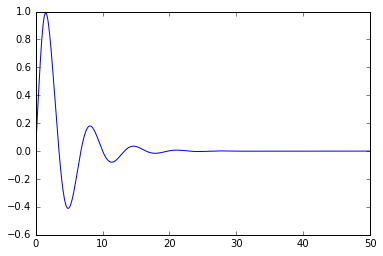

In [6]:
t,y=integra2(ecuacion,d_ecuacion,[0,1],[0,50])
plot(t,y[:,0])
show()

c) Integración son método de Runge-Kutta de 2° orden

In [7]:
def rk2(ec,p_ini,x,h=0.1):                       #Para Runge-Kutta se requiere la ecu. dif., la cond. inic., x el tiempo, y h
                                                 #el paso de integración.
    tiempos = arange(x[0],x[1]+h,h)              #El arreglo de tiempos va de x a y más h en intervalos de h.
    sol = zeros((len(tiempos),len(p_ini)))       #La variable solución es una arreglo de ceros.
    sol[0,:] = p_ini                             #Asignamos la cond. inic. a la columna 0 de la lista.
    for i in xrange(len(tiempos)-1):             #El ciclo va a recorrer la longitud de tiempo menos 1.
        k = h*ec(sol[i,:],tiempos[i])            #k es h por la ecu.dif. evaluada en la solución anterior
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)  #f es la ecu.dif. evaluada en la solución más un intervalok/2, y el tiempo más
                                                 #h/2
        sol[i+1,:]=sol[i,:]+h*f                  #El algoritmo de Rk regresa la condición inicial más h por la ecu.dif evaluada
                                                 #en los pasos anteriores.
    return tiempos,sol                           #La función regresa tiempos y soluciones

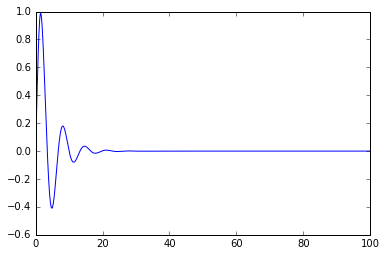

In [8]:
t,y=rk2(ecuacion,[0,1],[0,100])
plot(t,y[:,0])
show()

d) Integración con método de Rungen-Kutta de 4° orden

In [9]:
def rk4(ec,p_ini,x,h=0.1):                      #Para Runge-Kutta se requiere la ecu. dif., la cond. inic., x el tiempo, y h
                                                #el paso de integración.
    tiempos=arange(x[0],x[1]+h,h)               #El arreglo de tiempos va de x a y más h en intervalos de h.
    sol = zeros((len(tiempos),len(p_ini)))      #La variable solución es una arreglo de ceros.
    sol[0,:]=p_ini                              #Asignamos la cond. inic. a la columna 0 de la lista.
    for i in xrange(len(tiempos)-1):            #El ciclo va a recorrer la longitud de tiempo menos 1.
        k_1=ec(sol[i,:],tiempos[i])             #Para el metodo de RK 4to orden se realiza casi lo mismo que para el de 2do
                                                #k1 evaluamos la acu.dif en la iteración i
        k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)  #k2 evaluamos la ecu.dif. en la iteración i más h*k1/2 en x y t más h/2
        k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)  #k3 evaluamos la ecu.dif. en la iteración i más h*k2/2 en x y t más h/2
        k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)          #k4 evaluamos la ecu.dif. en la iter. i mas h*k3 y el timepo es t más h
        sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4) #El algoritmos dara la solución en cada ciclo como la cond.inic. mas
                                                           #h/6 por la suma de k1 a k4
    return tiempos,sol                          #La función regresa tiempo y soluciones.

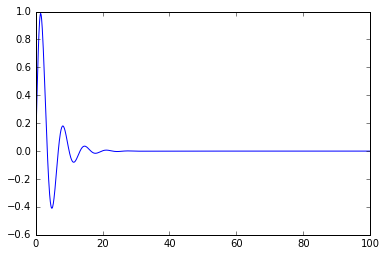

In [10]:
t,y=rk4(ecuacion,[0,1],[0,100])
plot(t,y[:,0])
show()

2.Utilizando los integradores anteriores encuentre el mejor paso de integración para la siguiente ecuación:
$$
\dddot y + \ddot y^2 - 3\dot y^3 + cos^2y = e^{-t}sin(3t)
$$
Con condiciones iniciales $\ddot y(1)=1, \dot y(1)=2, y(1)=1$. En partícular que sucede en el intervalo $t\in[1,2]$ y $t\in[1,2.1]$.

In [11]:
def ecuacion2(y,t):
    return array([y[1],y[2],-y[2]**y[2]+3*y[1]*y[1]*y[1]-cos(y[0])*cos(y[0])+exp(-t)*sin(3*t)])

def d_ecuacion2(y,t):
    return array([0,0,-exp(-t)*sin(3*t)+exp(-t)*3*cos(3*t)]),array([[1,2],[1,1],[-2*y[2]+9*y[1]*y[1]+sin(y[0])*sin(y[0])]])

a) Euler

In [13]:
sol = euler(ecuacion2,[0,array([1,1],[1,2])],20,0.01)
y = zeros(len(sol[0]))
v = zeros(len(sol[0]))
for i in range(len(sol[1])):
    y[i] = sol[1][i][0]
    v[i] = sol[1][i][1]
plot(sol[0],y)
show()

NameError: name 'euler_p' is not defined

3.Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial
$$
\ddot x + \frac{1}{10}\dot x + 4sinx = \frac{1}{2}sin(\omega t)
$$
Con condiciones iniciales $\dot x(0)=1$ y $x(0)=0$ y para $\omega=\{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado.

a) Euler

In [15]:
def euler_p(funcion, p_ini, t_final,w, h=0.01):   
    tiempos = arange(p_ini[0],t_final+h,h)    
    y = [0]*len(tiempos)                      
    y[0] = p_ini[1]                          
    for i in range(len(tiempos)-1):           
        y[i+1] = y[i] + funcion(y[i],tiempos[i],w)*h   
    solucion = [tiempos, y]                   
    return solucion

In [16]:
def ecuacion31(y,t,w):
    return array([y[1],-0.1*y[1]-4*sin(y[0])+0.5*sin(w*t)])

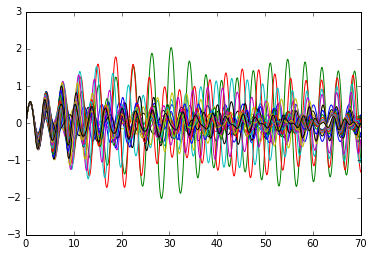

In [21]:
omega=arange(1,3.1,0.1)
for j in omega:
    sol = euler_p(ecuacion31,[0,array([0,1])],70,j)
    y = zeros(len(sol[0]))
    v = zeros(len(sol[0]))
    for i in range(len(sol[1])):
        y[i] = sol[1][i][0]
        v[i] = sol[1][i][1]
    plot(sol[0],y)
show()